In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # Useful for visualizing missing data

# Set display options for better viewing of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# --- Load the dataset ---
# The path is relative to the notebook's location.
# The notebook is in 'notebooks/', so we go up one level ('../') to 'credit-risk-model/',
# then into 'data/raw/', and finally specify the filename.
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: data.csv not found. Make sure it's in the 'data/raw/' directory.")
    # You might want to exit or load a dummy dataframe for testing if the file isn't found
    df = pd.DataFrame() # Create an empty DataFrame to avoid errors later

# --- Basic Information ---
print("\n--- Dataset Head (First 5 Rows) ---")
print(df.head())

print("\n--- Dataset Info (Data Types and Non-Null Counts) ---")
df.info()

print("\n--- Dataset Shape (Rows, Columns) ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- Column Names ---")
print(df.columns.tolist())

Dataset loaded successfully.

--- Dataset Head (First 5 Rows) ---
         TransactionId         BatchId       AccountId       SubscriptionId       CustomerId CurrencyCode  CountryCode    ProviderId     ProductId     ProductCategory    ChannelId   Amount  Value  TransactionStartTime  PricingStrategy  FraudResult
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10             airtime  ChannelId_3   1000.0   1000  2018-11-15T02:18:49Z                2            0
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6  financial_services  ChannelId_2    -20.0     20  2018-11-15T02:19:08Z                2            0
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1             airtime  ChannelId_3    500.0  

In [7]:
print("\n--- Descriptive Statistics for Numerical Features ---")
print(df.describe())

print("\n--- Descriptive Statistics for Categorical Features ---")
# Include 'object' and 'category' dtypes
print(df.describe(include='object'))


--- Descriptive Statistics for Numerical Features ---
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

--- Descriptive Statistics for Categorical Features ---
              TransactionId        BatchId       AccountId       SubscriptionId       CustomerId CurrencyCode    ProviderId    ProductId     ProductCategory    ChannelId  TransactionStar


--- Visualizing Distributions of Numerical Features ---


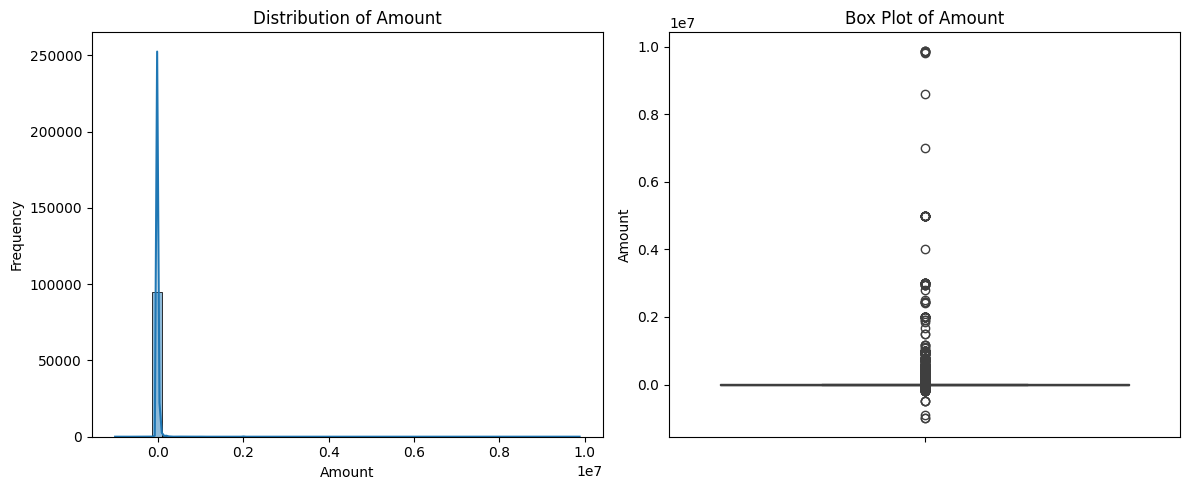

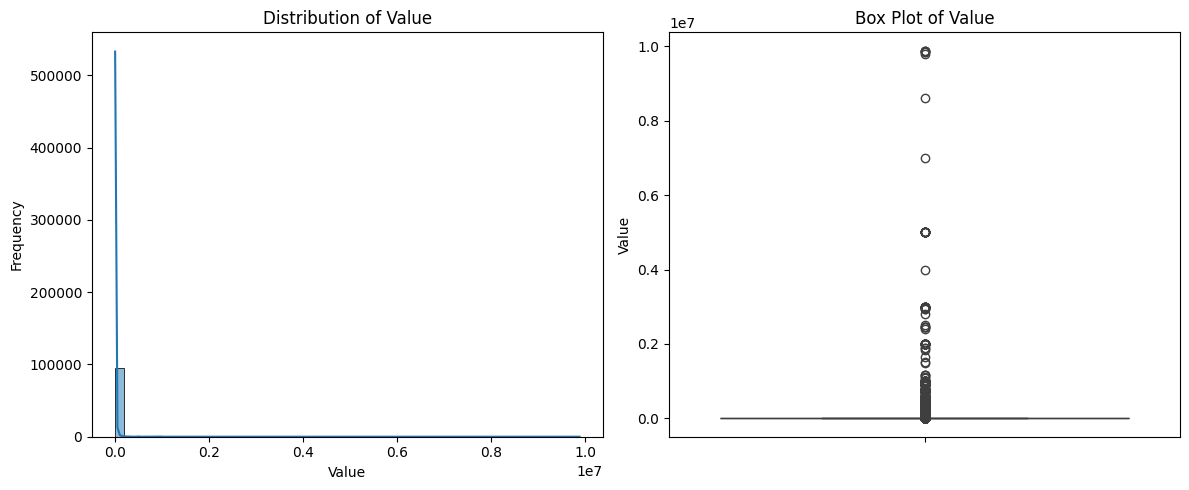

In [8]:
# Select numerical columns (adjust based on your df.info() output)
numerical_cols = ['Amount', 'Value'] # Add other numerical columns if any

print("\n--- Visualizing Distributions of Numerical Features ---")
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot for Outlier Detection
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()


--- Visualizing Distributions of Categorical Features ---


C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\1074550824.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


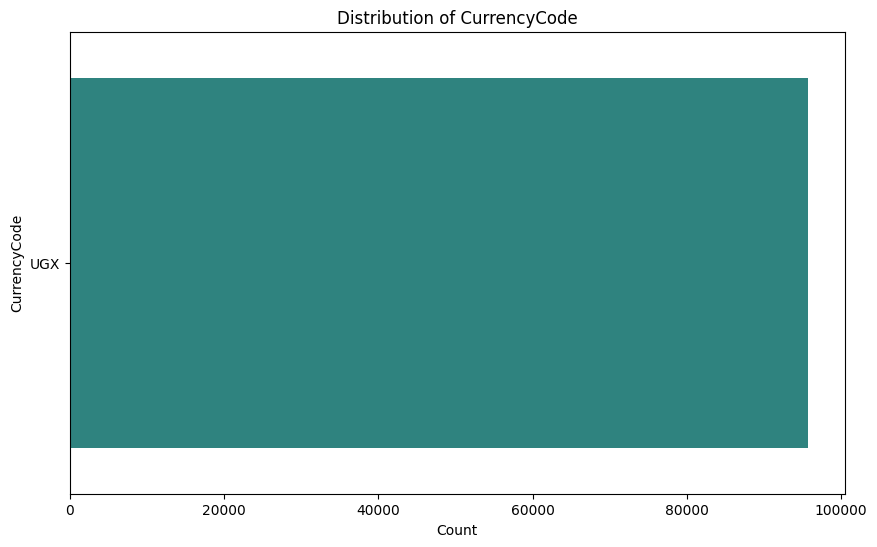

C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\1074550824.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


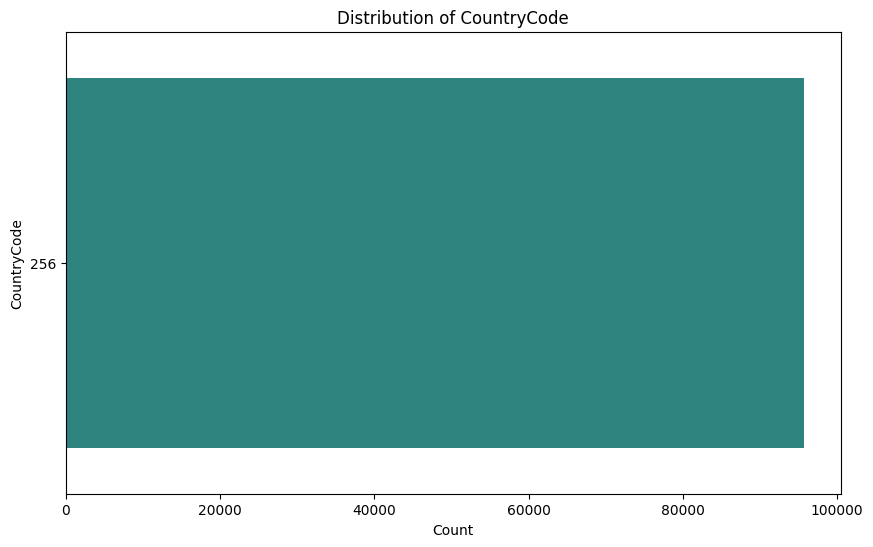

C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\1074550824.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


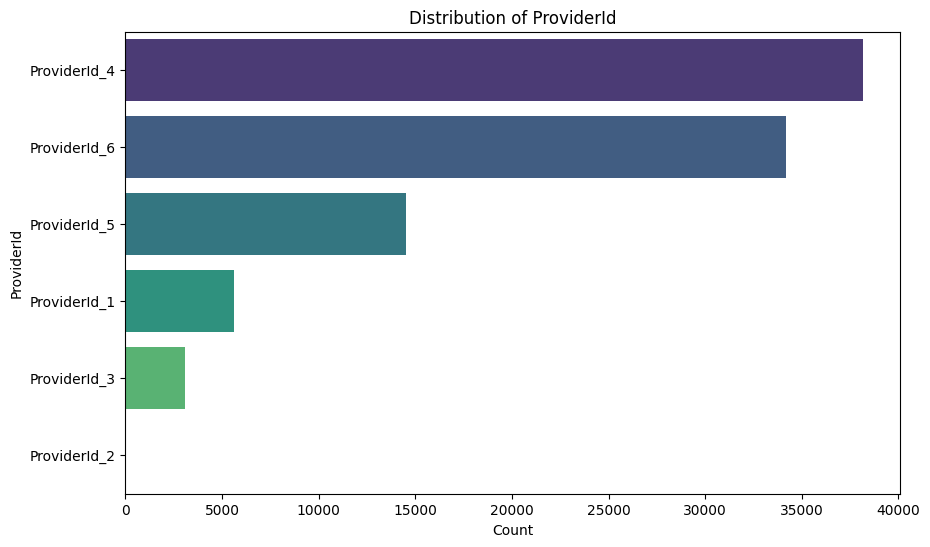

C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\1074550824.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


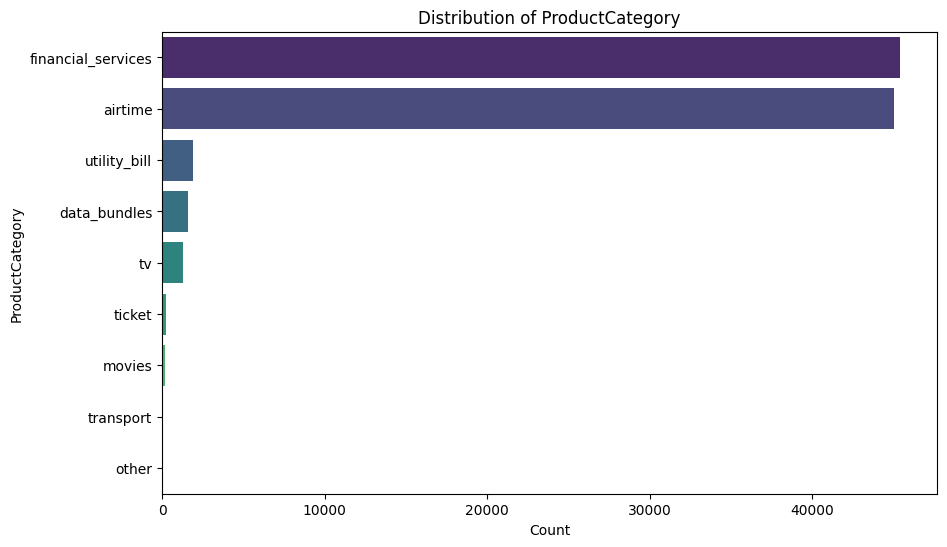

C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\1074550824.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


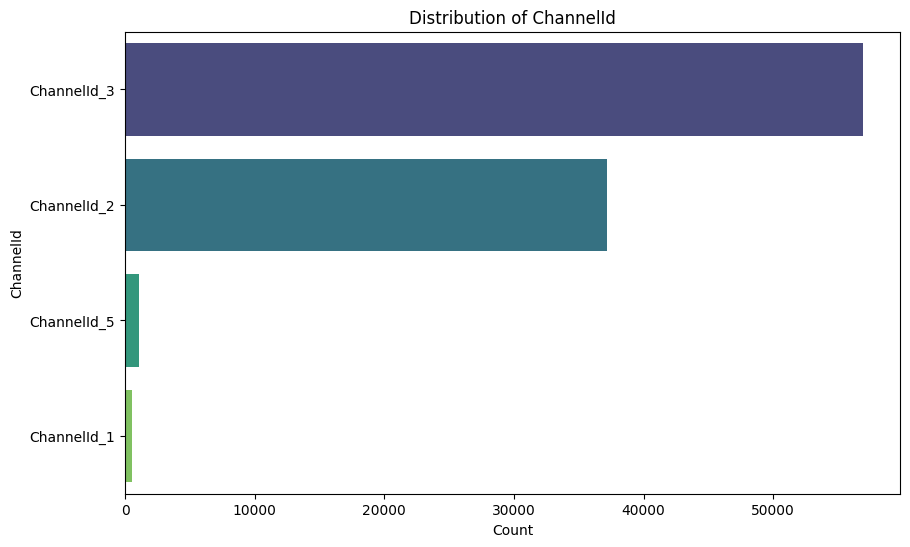

C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\1074550824.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


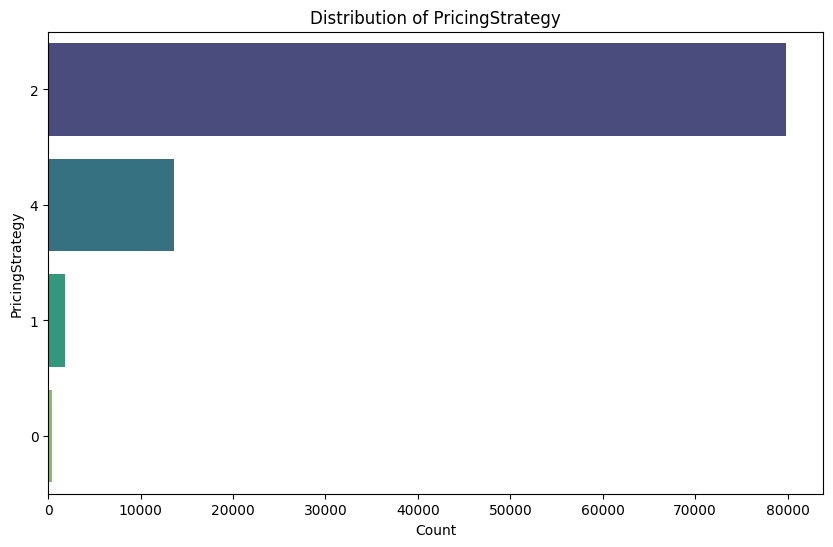

C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\1074550824.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


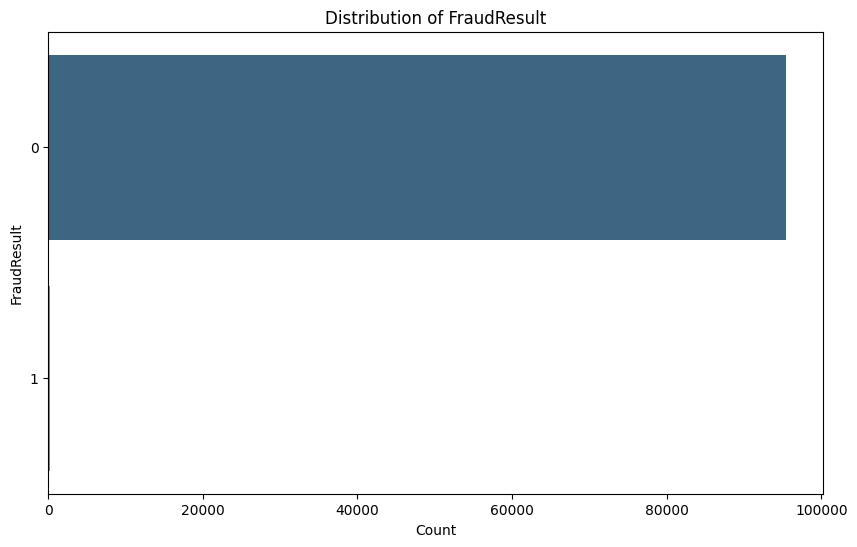


--- FraudResult Distribution ---
FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\1074550824.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['FraudResult'], palette='coolwarm')


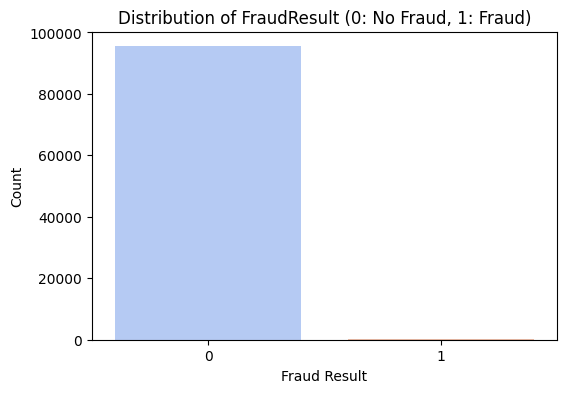

In [9]:
# Select categorical columns (adjust based on your df.info() output)
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory',
                    'ChannelId', 'PricingStrategy', 'FraudResult']

print("\n--- Visualizing Distributions of Categorical Features ---")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Use value_counts to get order for plotting
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Special check for FraudResult - it's your potential target for fraud, though not credit risk
print("\n--- FraudResult Distribution ---")
print(df['FraudResult'].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(x=df['FraudResult'], palette='coolwarm')
plt.title('Distribution of FraudResult (0: No Fraud, 1: Fraud)')
plt.xlabel('Fraud Result')
plt.ylabel('Count')
plt.show()


--- Correlation Matrix of Numerical Features ---
                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


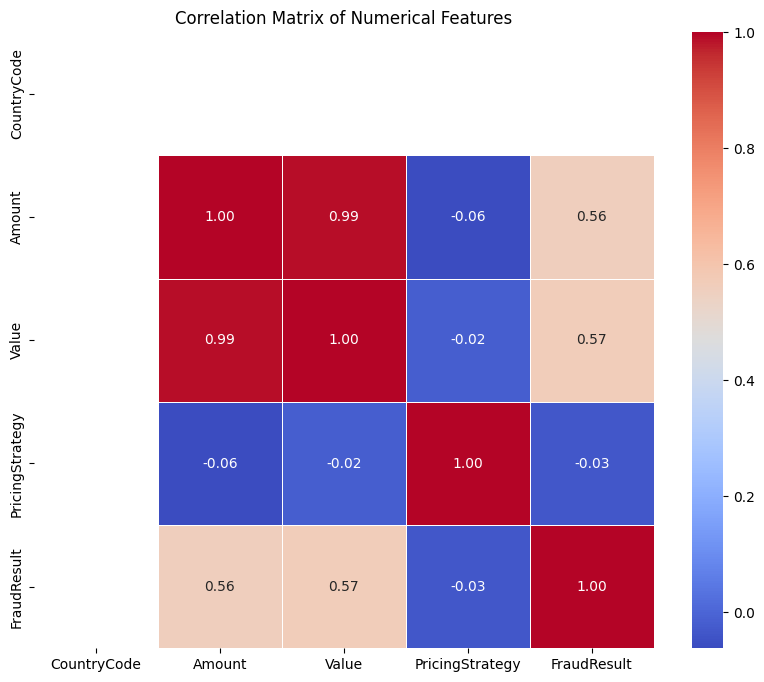

In [10]:
print("\n--- Correlation Matrix of Numerical Features ---")
# Ensure only numerical columns are selected for correlation
df_numerical = df.select_dtypes(include=np.number)
correlation_matrix = df_numerical.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
print("\n--- Missing Values Analysis ---")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
print(missing_df)

# Visualize missing data (if any)
if not missing_df.empty:
    print("\n--- Visualizing Missing Values ---")
    msno.matrix(df, figsize=(12, 8), color=(0.2, 0.4, 0.6)) # Adjust color as desired
    plt.title('Missing Values Matrix')
    plt.show()
    msno.bar(df, figsize=(12, 6), color='lightgreen')
    plt.title('Missing Values Bar Chart')
    plt.show()
else:
    print("No missing values found in the dataset.")


--- Missing Values Analysis ---
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
No missing values found in the dataset.



--- Time-Based Feature Extraction and Analysis ---


C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\3097001703.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transaction_hour', data=df, palette='cividis')


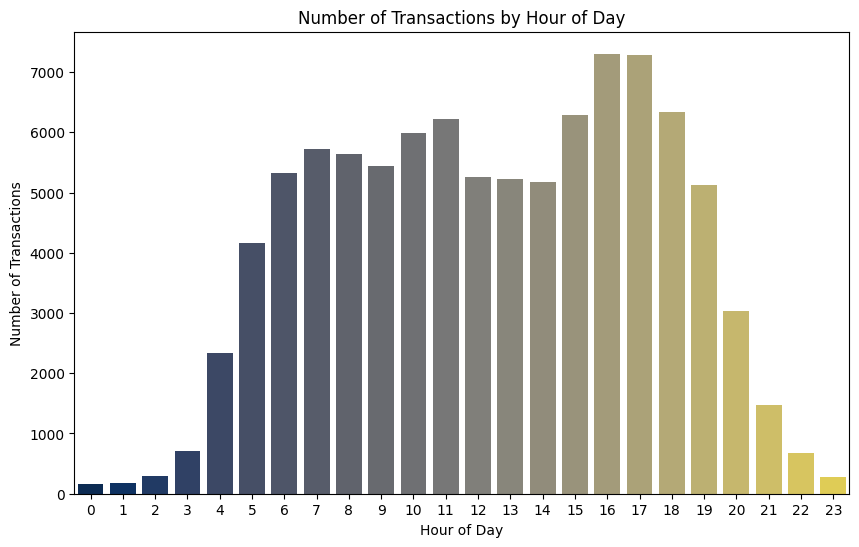

C:\Users\koffy\AppData\Local\Temp\ipykernel_16400\3097001703.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transaction_day_of_week', data=df, palette='magma')


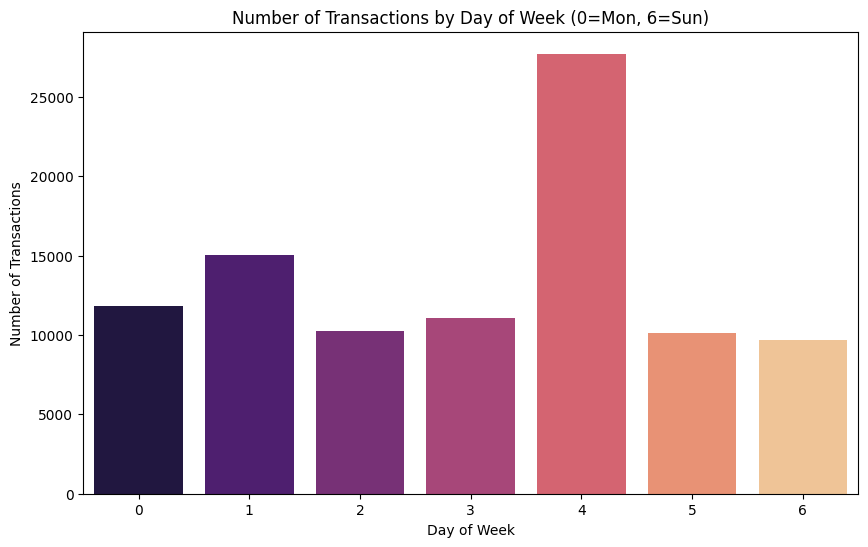

In [13]:
print("\n--- Time-Based Feature Extraction and Analysis ---")
# Convert 'TransactionStartTime' to datetime objects
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract time-based features
df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day_of_week'] = df['TransactionStartTime'].dt.dayofweek # Monday=0, Sunday=6
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_year'] = df['TransactionStartTime'].dt.year

# Analyze trends (e.g., transactions per hour of day)
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_hour', data=df, palette='cividis')
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_day_of_week', data=df, palette='magma')
plt.title('Number of Transactions by Day of Week (0=Mon, 6=Sun)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()

# You can do similar plots for month, year, etc.